# 팀순위, 수비 (실책, 풋아웃, 수비율)

In [3]:
import mysql.connector
eda = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",
    database = "KBO"
)


In [481]:
eda.close()

In [21]:
cursor = eda.cursor(buffered=True)
sql = (f'''select r.year,r.순위, t.팀_이름, t.풋아웃, t.수비율  
          from 팀기록_수비 t, 연도별_팀순위 r     
          where t.팀_이름=r.팀명 and t.year =2022 and r.year=22; ''')
cursor.execute(sql)

result = cursor.fetchall()
df_defence_22 = pd.DataFrame(result, columns=('연도','순위','팀명','풋아웃','수비율'))

cursor = eda.cursor(buffered=True)
sql = (f'''select r.year,r.순위, t.팀_이름,  t.풋아웃, t.수비율  
          from 팀기록_수비 t, 연도별_팀순위 r     
          where t.팀_이름=r.팀명 and t.year =2023 and r.year=23; ''')
cursor.execute(sql)

result = cursor.fetchall()
df_defence_23 = pd.DataFrame(result, columns=('연도','순위','팀명','풋아웃','수비율'))

cursor = eda.cursor(buffered=True)
sql = (f'''select r.year,r.순위, t.팀_이름,  t.풋아웃, t.수비율  
          from 팀기록_수비 t, 연도별_팀순위 r     
          where t.팀_이름=r.팀명 and t.year =2024 and r.year=24; ''')
cursor.execute(sql)

result = cursor.fetchall()
df_defence_24 = pd.DataFrame(result, columns=('연도','순위','팀명','풋아웃','수비율'))


In [22]:
df_defence_24.sort_values(by='순위', inplace= True)
df_defence_23.sort_values(by='순위', inplace= True)
df_defence_22.sort_values(by='순위', inplace= True)

In [23]:
df_defence_24['수비율'] = df_defence_24['수비율']*100 
df_defence_23['수비율'] = df_defence_23['수비율']*100 
df_defence_22['수비율'] = df_defence_22['수비율']*100 

In [24]:
str(df_defence_24['순위'][0])+'위 '+df_defence_24['팀명'][0]

'4위 두산'

In [ ]:
for i in range(10):
    df_defence_24['팀명'][i] = str(df_defence_24['순위'][i])+'위 '+df_defence_24['팀명'][i]
    df_defence_23['팀명'][i] = str(df_defence_23['순위'][i])+'위 '+df_defence_23['팀명'][i]
    df_defence_22['팀명'][i] = str(df_defence_22['순위'][i])+'위 '+df_defence_22['팀명'][i]

In [33]:
df_defence_22

,연도,순위,팀명,풋아웃,수비율
0,22,1,1위 SSG,3904,98.0
1,22,2,2위 키움,3889,97.9
2,22,3,3위 LG,3864,98.3
3,22,4,4위 KT,3862,98.2
7,22,5,5위 KIA,3839,98.0
5,22,6,6위 NC,3860,97.6
4,22,7,7위 삼성,3861,97.8
6,22,8,8위 롯데,3842,97.9
8,22,9,9위 두산,3838,97.8
9,22,10,10위 한화,3805,97.5


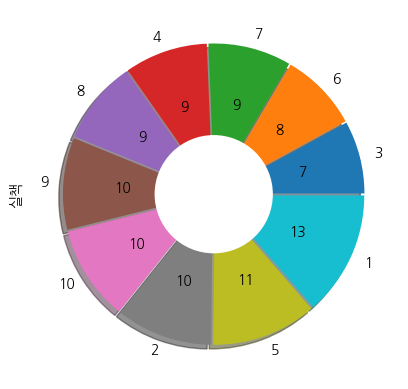

In [41]:
explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)
df_defence_24['실책'].plot.pie(explode=explode, autopct='%d',shadow=True,)
circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

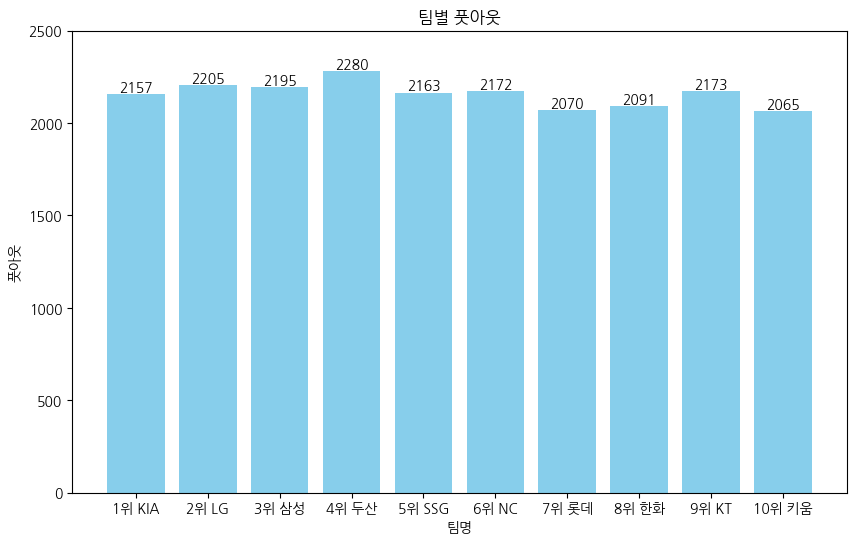

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df_defence_24['팀명'], df_defence_24['풋아웃'], color='skyblue')
plt.title('팀별 풋아웃')
plt.xlabel('팀명')
plt.ylabel('풋아웃')
plt.yticks(range(0,3000, 500))
for i, v in enumerate(df_defence_24['풋아웃']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()


In [30]:
fig, ax1= plt.subplots(figsize=(12,8))

ax1.set_xlabel('팀명')
ax1.set_ylabel('풋아웃', color='DodgerBlue')
bars = ax1.bar(df_defence_24['팀명'], df_defence_24['풋아웃'],color='skyblue')
ax1.tick_params(axis='y')
for i, v in enumerate(df_defence_24['풋아웃']):
    plt.text(i, v + 1, v, ha='center', va='bottom', color='DodgerBlue')

ax2 = ax1.twinx()
ax2.set_ylabel('수비율', color='tomato')
ax2.yaxis.set_label_position('right')
line = ax2.plot(df_defence_24['팀명'], df_defence_24['수비율'], color='tomato', marker='o', linestyle='none')
ax2.tick_params(axis='y')
for i, v in enumerate(df_defence_24['수비율']):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom',color='tomato' )

ax1.set_ylim(1700, 2350)
ax2.set_ylim(0.960, 1.000)

plt.title('24년 수비의 풋아웃과 수비율')
fig.tight_layout()  # 자동으로 레이아웃 조정
plt.show()

/tmp/ipykernel_4449/2874942543.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()  # 자동으로 레이아웃 조정


ValueError: Image size of 1078x1499110 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 2 Axes>

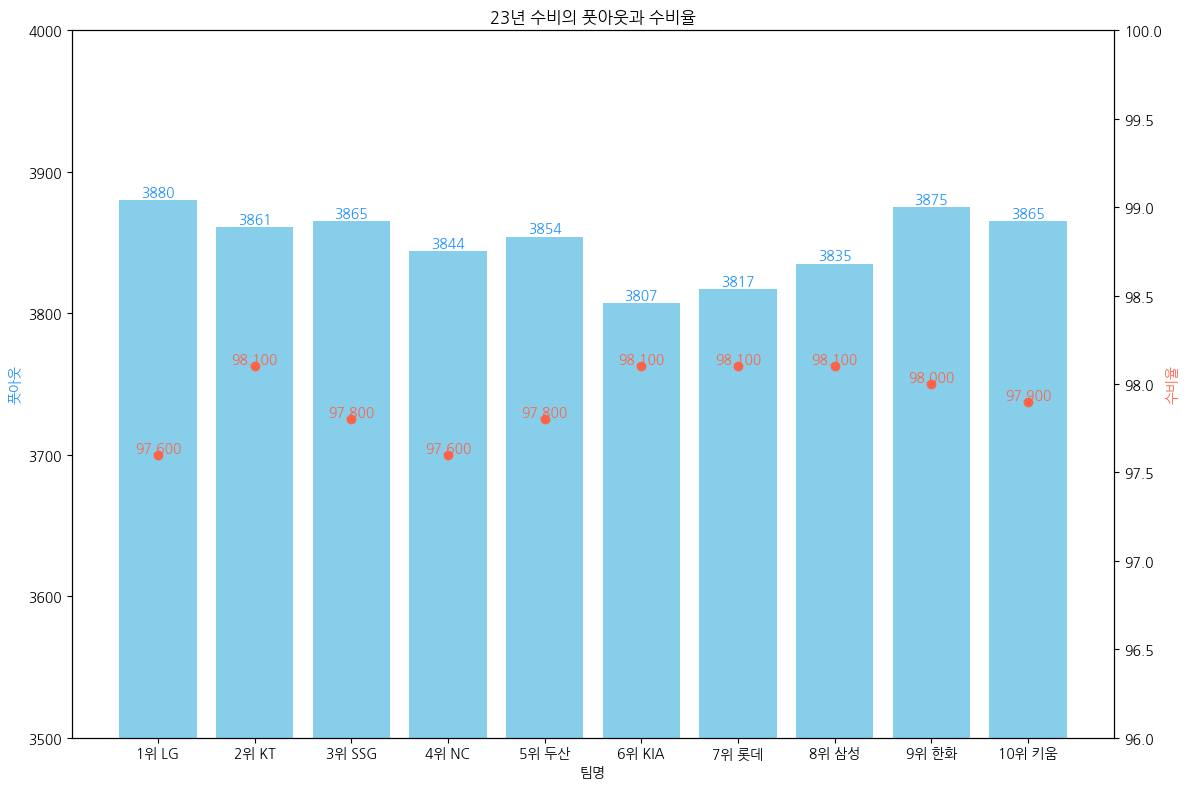

In [35]:
fig, ax1= plt.subplots(figsize=(12,8))

ax1.set_xlabel('팀명')
ax1.set_ylabel('풋아웃', color='DodgerBlue')
bars = ax1.bar(df_defence_23['팀명'], df_defence_23['풋아웃'],color='skyblue')
ax1.tick_params(axis='y')
for i, v in enumerate(df_defence_23['풋아웃']):
    plt.text(i, v + 1, v, ha='center', va='bottom', color='DodgerBlue')

ax2 = ax1.twinx()
ax2.set_ylabel('수비율', color='tomato')
ax2.yaxis.set_label_position('right')
line = ax2.plot(df_defence_23['팀명'], df_defence_23['수비율'], color='tomato', marker='o', linestyle='none')
ax2.tick_params(axis='y')
for i, v in enumerate(df_defence_23['수비율']):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom',color='tomato' )


ax1.set_ylim(3500, 4000)
ax2.set_ylim(96.0, 100.0)


plt.title('23년 수비의 풋아웃과 수비율')
fig.tight_layout()  # 자동으로 레이아웃 조정
plt.show()


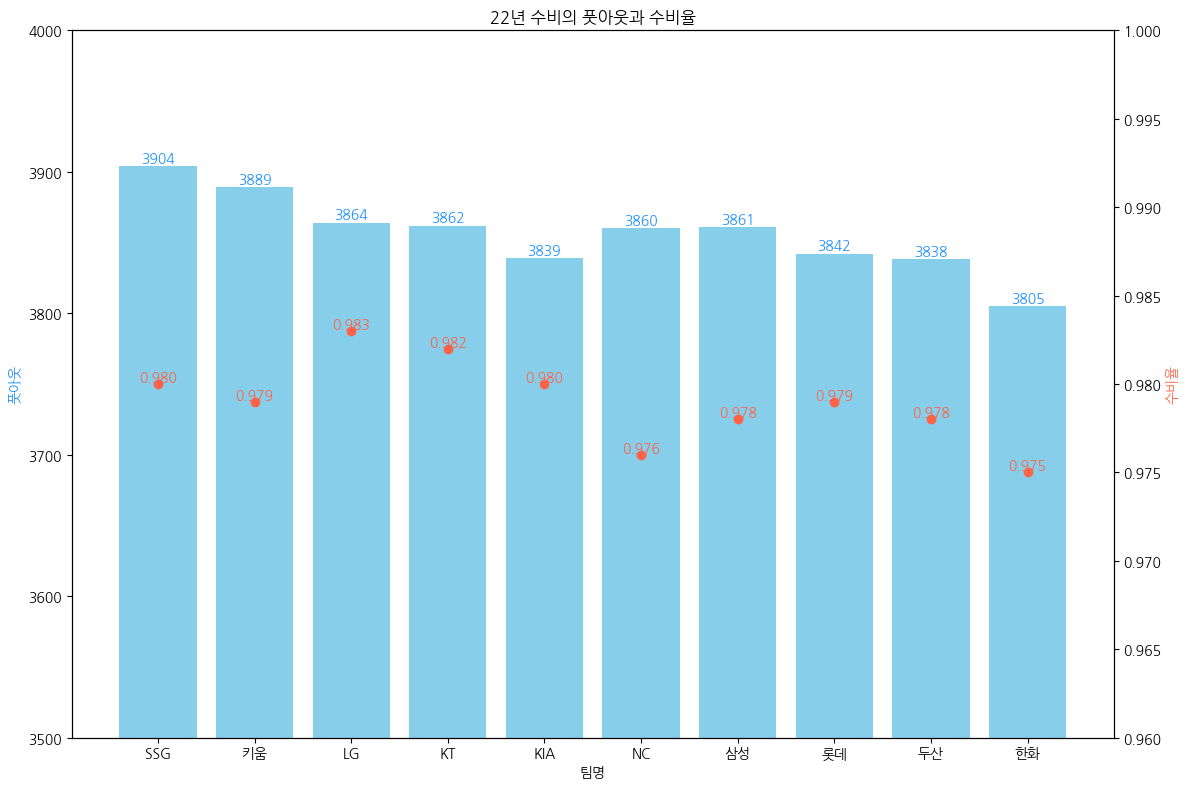

In [217]:
fig, ax1= plt.subplots(figsize=(12,8))

ax1.set_xlabel('팀명')
ax1.set_ylabel('풋아웃', color='DodgerBlue')
bars = ax1.bar(df_defence_22['팀명'], df_defence_22['풋아웃'],color='skyblue')
ax1.tick_params(axis='y')
for i, v in enumerate(df_defence_22['풋아웃']):
    plt.text(i, v + 1, v, ha='center', va='bottom', color='DodgerBlue')

ax2 = ax1.twinx()
ax2.set_ylabel('수비율', color='tomato')
ax2.yaxis.set_label_position('right')
line = ax2.plot(df_defence_22['팀명'], df_defence_22['수비율'], color='tomato', marker='o', linestyle='none')
ax2.tick_params(axis='y')
for i, v in enumerate(df_defence_22['수비율']):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom',color='tomato' )

ax1.set_ylim(3500, 4000)
ax2.set_ylim(0.960, 1.000)

plt.title('22년 수비의 풋아웃과 수비율')
fig.tight_layout()  # 자동으로 레이아웃 조정
plt.show()


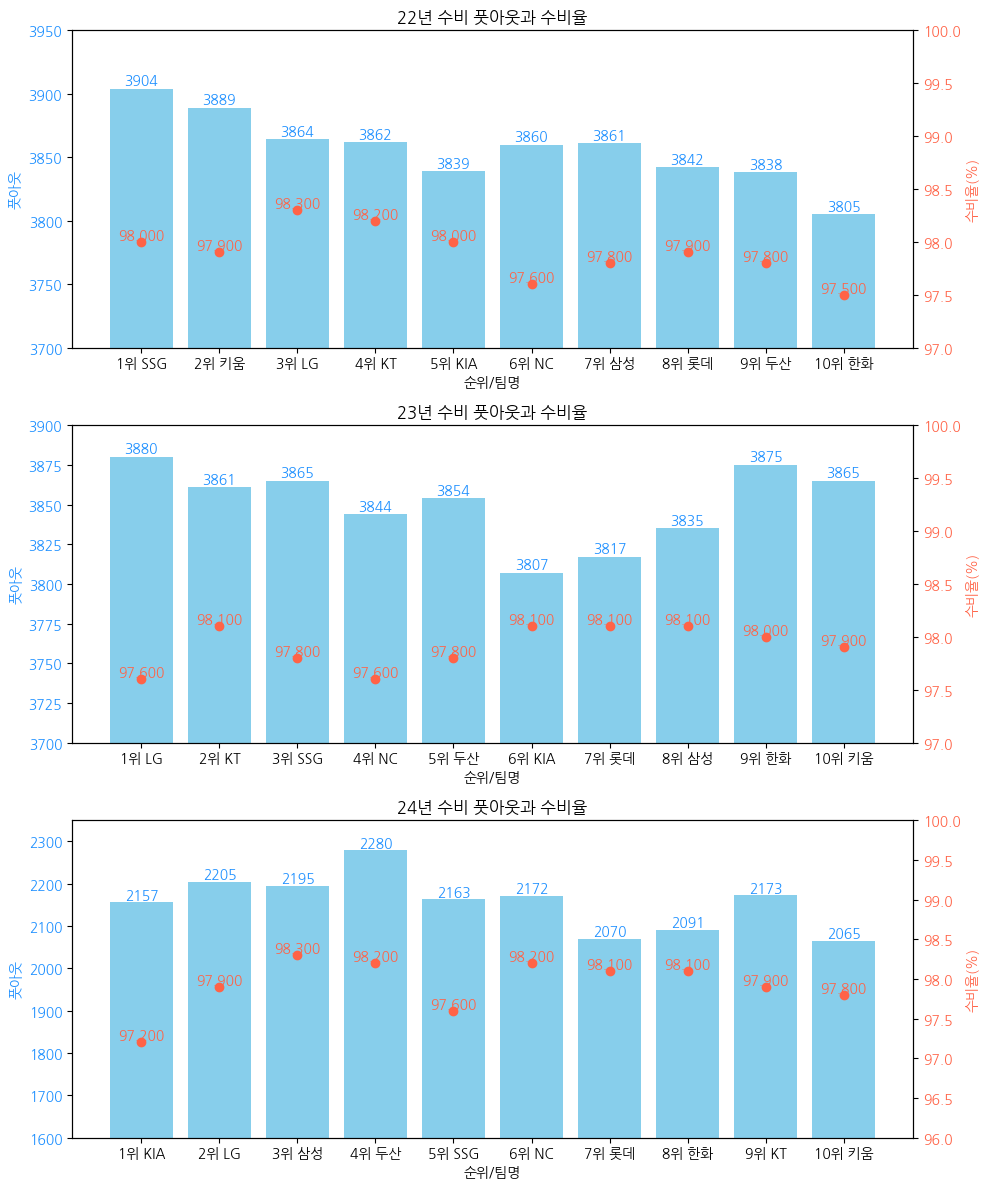

In [476]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# =========================================첫 번째 서브플롯 (22년 데이터)
ax1 = axs[0]
ax1.set_xlabel('순위/팀명')
ax1.set_ylabel('풋아웃', color='DodgerBlue')
bars1 = ax1.bar(df_defence_22['팀명'], df_defence_22['풋아웃'], color='skyblue')
ax1.tick_params(axis='y', labelcolor='DodgerBlue')
for i, v in enumerate(df_defence_22['풋아웃']):
    ax1.text(i, v +1, str(v), ha='center', va='bottom', color='DodgerBlue')

ax1_2 = ax1.twinx()
ax1_2.set_ylabel('수비율(%)', color='tomato')
line1 = ax1_2.plot(df_defence_22['팀명'], df_defence_22['수비율'], color='tomato', marker='o', linestyle='none')
ax1_2.tick_params(axis='y', labelcolor='tomato')
for i, v in enumerate(df_defence_22['수비율']):
    ax1_2.text(i, v, f'{v:.3f}', ha='center', va='bottom', color='tomato')

ax1.set_ylim(3700, 3950)
ax1_2.set_ylim(97.0, 100.0)
ax1.set_title('22년 수비 풋아웃과 수비율')

# ===========================================두 번째 서브플롯 (23년 데이터)
ax2 = axs[1]
ax2.set_xlabel('순위/팀명')
ax2.set_ylabel('풋아웃', color='DodgerBlue')
bars2 = ax2.bar(df_defence_23['팀명'], df_defence_23['풋아웃'], color='skyblue')
ax2.tick_params(axis='y', labelcolor='DodgerBlue')
for i, v in enumerate(df_defence_23['풋아웃']):
    ax2.text(i, v +1, str(v), ha='center', va='bottom', color='DodgerBlue')

ax2_2 = ax2.twinx()
ax2_2.set_ylabel('수비율(%)', color='tomato')
line2 = ax2_2.plot(df_defence_23['팀명'], df_defence_23['수비율'], color='tomato', marker='o', linestyle='none')
ax2_2.tick_params(axis='y', labelcolor='tomato')
for i, v in enumerate(df_defence_23['수비율']):
    ax2_2.text(i, v, f'{v:.3f}', ha='center', va='bottom', color='tomato')

ax2.set_ylim(3700, 3900)
ax2_2.set_ylim(97.0, 100.0)
ax2.set_title('23년 수비 풋아웃과 수비율')

# ===========================================세 번째 서브플롯 (24년 데이터)
ax3 = axs[2]
ax3.set_xlabel('순위/팀명')
ax3.set_ylabel('풋아웃', color='DodgerBlue')
bars3 = ax3.bar(df_defence_24['팀명'], df_defence_24['풋아웃'], color='skyblue')
ax3.tick_params(axis='y', labelcolor='DodgerBlue')
for i, v in enumerate(df_defence_24['풋아웃']):
    ax3.text(i, v +1, str(v), ha='center', va='bottom', color='DodgerBlue')

ax3_2 = ax3.twinx()
ax3_2.set_ylabel('수비율(%)', color='tomato')
line3 = ax3_2.plot(df_defence_24['팀명'], df_defence_24['수비율'], color='tomato', marker='o', linestyle='none')
ax3_2.tick_params(axis='y', labelcolor='tomato')
for i, v in enumerate(df_defence_24['수비율']):
    ax3_2.text(i, v, f'{v:.3f}', ha='center', va='bottom', color='tomato')

ax3.set_ylim(1600, 2350)
ax3_2.set_ylim(96.0, 100.0)
ax3.set_title('24년 수비 풋아웃과 수비율')


plt.tight_layout()
plt.show()

# ABS 도입이 KBO 리그에 미친 영향 

## ABS 도입으로 투수의 사구 개수가 많아졌을까?

ABS : ABS는 Automated Ball-Strike System의 약자다. 야구경기에서 자동으로 스트라이크와 볼을 판정하는 시스템.

In [511]:
import mysql.connector
eda = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",
    database = "KBO"
)

In [522]:
team_22 = [] ;team_23 = []; team_24 = []

In [508]:
cur = eda.cursor(buffered=True)
cur.execute('select*from 팀기록_투수 where year like 22')

result = cur.fetchall()

for i in result:
    team_22.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select*from 팀기록_투수 where year like 23')

result = cur.fetchall()

for i in result:
    team_23.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select*from 팀기록_투수 where year like 24')

result = cur.fetchall()

for i in result:
    team_24.append(i)


In [515]:
eda.close()

In [325]:
df_team_22 = pd.DataFrame(team_22, columns=('yaar','순위','팀명','평균자책점','경기_수','승리','패배','세이브','홀드','승률','이닝','피안타','홈련','볼넷','사구','삼진','실점','자책점','이닝당출루허용률','완투','완봉','퀄리티스타트','블론세이브','타자수','투구수','피안타율','2루타','3루타','희생번트','희생플라이', '고의사구', '폭투','보크')) 
df_team_23 = pd.DataFrame(team_23, columns=('yaar','순위','팀명','평균자책점','경기_수','승리','패배','세이브','홀드','승률','이닝','피안타','홈련','볼넷','사구','삼진','실점','자책점','이닝당출루허용률','완투','완봉','퀄리티스타트','블론세이브','타자수','투구수','피안타율','2루타','3루타','희생번트','희생플라이', '고의사구', '폭투','보크')) 
df_team_24 = pd.DataFrame(team_24, columns=('yaar','순위','팀명','평균자책점','경기_수','승리','패배','세이브','홀드','승률','이닝','피안타','홈련','볼넷','사구','삼진','실점','자책점','이닝당출루허용률','완투','완봉','퀄리티스타트','블론세이브','타자수','투구수','피안타율','2루타','3루타','희생번트','희생플라이', '고의사구', '폭투','보크')) 

사구 총합, 경기수 총합

In [523]:
cur = eda.cursor(buffered=True)
cur.execute('select sum(볼넷), sum(경기_수) from 팀기록_투수 where year like 22;')

result = cur.fetchall()

for i in result:
    print(i)
    team_22.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select sum(볼넷), sum(경기_수) from 팀기록_투수 where year like 23;')

result = cur.fetchall()

for i in result:
    team_23.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select sum(볼넷), sum(경기_수) from 팀기록_투수 where year like 24;')

result = cur.fetchall()

for i in result:
    team_24.append(i)

(Decimal('4930'), Decimal('1440'))


In [524]:
df_team_22= pd.DataFrame(team_22, columns=('볼넷수', '경기수'))
df_team_23= pd.DataFrame(team_23, columns=('볼넷수', '경기수'))
df_team_24= pd.DataFrame(team_24, columns=('볼넷수', '경기수'))

In [528]:
df_team_22

,볼넷수,경기수
0,4930,1440


In [530]:
round(df_team_22['볼넷수'][0]/df_team_22['경기수'][0],2)

Decimal('3.42')

In [531]:
df_team_22['볼넷수/경기수'] = round((df_team_22['볼넷수'][0]/df_team_22['경기수'][0]),2)
df_team_23['볼넷수/경기수'] = round((df_team_23['볼넷수'][0]/df_team_23['경기수'][0]),2)
df_team_24['볼넷수/경기수'] = round((df_team_24['볼넷수'][0]/df_team_24['경기수'][0]),2)

In [532]:
df_team_22['볼넷수/경기수']

0    3.42
Name: 볼넷수/경기수, dtype: object

In [533]:
df_team_22

,볼넷수,경기수,볼넷수/경기수
0,4930,1440,3.42


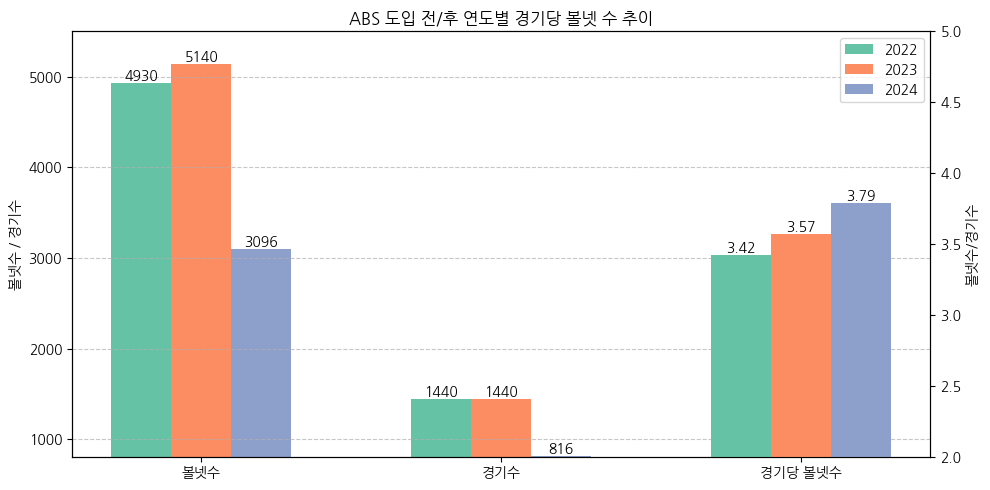

In [552]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # 두 번째 y축 생성

# x축 카테고리
categories = ['볼넷수', '경기수', '경기당 볼넷수']

# 막대의 위치와 너비 설정
x = np.arange(len(categories))
width = 0.2

colors = ['#66c2a5', '#fc8d62', '#8da0cb'] # 2022, 2023, 2024년 색상

# 데이터 추출 및 그래프 그리기
for i, (year, df) in enumerate(zip(['2022', '2023', '2024'], [df_team_22, df_team_23, df_team_24])):
    볼넷수 = df['볼넷수'][0]
    경기수 = df['경기수'][0]
    볼넷수_경기수 = 볼넷수 / 경기수
    
    # 사구수와 경기수는 ax1에 그리기
    ax1.bar(x[:2] + (i-1)*width, [볼넷수, 경기수], width, label=year, color=colors[i])
    
    # 사구수/경기수는 ax2에 그리기
    ax2.bar(x[2] + (i-1)*width, 볼넷수_경기수, width, color=colors[i])

    # 각 막대 위에 값 표시
    for j, val in enumerate([볼넷수, 경기수]):
        ax1.text(x[j] + (i-1)*width, val, f'{val:.0f}', ha='center', va='bottom')
    
    ax2.text(x[2] + (i-1)*width, 볼넷수_경기수, f'{볼넷수_경기수:.2f}', ha='center', va='bottom')

# 그래프 꾸미기
ax1.set_ylabel('볼넷수 / 경기수')
ax2.set_ylabel('볼넷수/경기수')
ax1.set_title('ABS 도입 전/후 연도별 경기당 볼넷 수 추이')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper right')

# 그리드 추가
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# y축 범위 설정
ax1.set_ylim(800,  5500)
ax2.set_ylim(2.00, 5.00)

plt.tight_layout()
plt.show()

- 아직 24시즌이 끝나지 않았기 때문에 경기당 수로 계산해보니, 지난 2시즌과 비교하였을 때 ABS 도입 후 사구수가 늘었음을 알 수있다. 

팁별

In [539]:
sagu_22 =[]; sagu_23 =[]; sagu_24 =[] 

In [540]:
cursor = eda.cursor(buffered=True)
sql = (f'''select 팀명,  볼넷 , 경기_수 from 팀기록_투수 where year like 22 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    sagu_22.append(i)

cursor = eda.cursor(buffered=True)
sql = (f'''select  팀명,  볼넷 , 경기_수 from 팀기록_투수 where year like 23 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    sagu_23.append(i)

cursor = eda.cursor(buffered=True)
sql = (f'''select  팀명,  볼넷 , 경기_수 from 팀기록_투수 where year like 24 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    sagu_24.append(i)

In [541]:
df_sagu_24 = pd.DataFrame(sagu_24, columns=('팀명','볼넷수','경기수')).sort_values(by='팀명')
df_sagu_23= pd.DataFrame(sagu_23, columns=('팀명','볼넷수','경기수')).sort_values(by='팀명')
df_sagu_22= pd.DataFrame(sagu_22, columns=('팀명','볼넷수','경기수')).sort_values(by='팀명')

In [542]:
df_sagu_24['볼넷수']= round((df_sagu_24['볼넷수']/df_sagu_24['경기수']),2)
df_sagu_23['볼넷수']= round((df_sagu_23['볼넷수']/df_sagu_23['경기수']),2)
df_sagu_22['볼넷수']= round((df_sagu_22['볼넷수']/df_sagu_22['경기수']),2)

In [543]:
df_sagu_24

,팀명,볼넷수,경기수
0,KIA,3.91,81
9,KT,3.29,83
2,LG,3.99,84
4,NC,3.49,81
8,SSG,4.49,82
3,두산,3.91,85
5,롯데,3.68,78
1,삼성,3.63,83
6,키움,3.70,79
7,한화,3.85,80


<Axes: xlabel='팀명'>

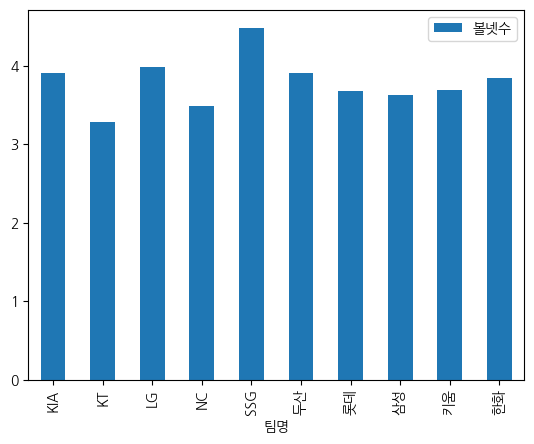

In [544]:
df_sagu_24.plot(kind='bar',x='팀명',y='볼넷수')


In [545]:
df_sagu_23

,팀명,볼넷수,경기수
4,KIA,3.92,144
3,KT,2.87,144
0,LG,3.41,144
1,NC,3.56,144
6,SSG,4.25,144
2,두산,3.48,144
5,롯데,3.69,144
9,삼성,3.22,144
8,키움,3.69,144
7,한화,3.60,144


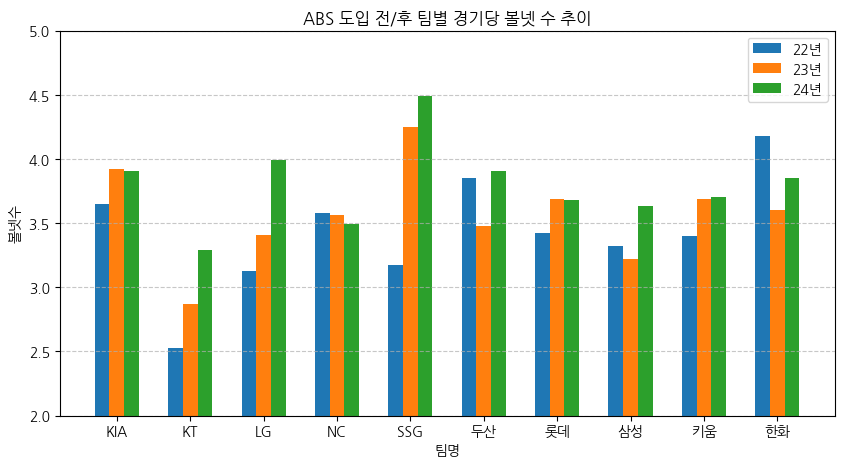

In [550]:
w = 0.2
idx = np.arange(10) #행 갯수

plt.figure(figsize=(10,5))
plt.bar(idx - w, df_sagu_22['볼넷수'], width=w, label= '22년')
plt.bar(idx , df_sagu_23['볼넷수'],width=w,label= '23년')
plt.bar(idx + w, df_sagu_24['볼넷수'],width=w, label= '24년')
plt.xticks(idx, df_sagu_22['팀명'])
plt.legend()
plt.title('ABS 도입 전/후 팀별 경기당 볼넷 수 추이')
plt.xlabel('팀명')
plt.ylabel('볼넷수')
plt.ylim(2.0,5.0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

- 볼넷 갯수가 많아진 팀도 있지만 희박하게 줄어든 팀이 있기는해서 무조건적으로 ABS 때문에 볼넷이 많아졌다고 보기는 어렵다

## ABS 도입으로 투수의 삼진 개수가 많아졌을까?

In [165]:
team_22_2= []; team_23_2 = []; team_24_2=[]

In [166]:
cur = eda.cursor(buffered=True)
cur.execute('select sum(삼진), sum(경기_수) from 팀기록_투수 where year like 22;')

result = cur.fetchall()

for i in result:
    print(i)
    team_22_2.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select sum(삼진), sum(경기_수) from 팀기록_투수 where year like 23;')

result = cur.fetchall()

for i in result:
    team_23_2.append(i)

cur = eda.cursor(buffered=True)
cur.execute('select sum(삼진), sum(경기_수) from 팀기록_투수 where year like 24;')

result = cur.fetchall()

for i in result:
    team_24_2.append(i)

(Decimal('10469'), Decimal('1440'))


In [167]:
df_team_22_2= pd.DataFrame(team_22_2, columns=('삼진수', '경기수'))
df_team_23_2= pd.DataFrame(team_23_2, columns=('삼진수', '경기수'))
df_team_24_2= pd.DataFrame(team_24_2, columns=('삼진수', '경기수'))
df_team_22_2['삼진수/경기수'] = df_team_22_2['삼진수']/df_team_22_2['경기수']
df_team_23_2['삼진수/경기수'] = df_team_23_2['삼진수']/df_team_23_2['경기수']
df_team_24_2['삼진수/경기수'] = df_team_24_2['삼진수']/df_team_24_2['경기수']

In [ ]:
df_team_22_2['삼진수/경기수'][0] = round(df_team_22_2['삼진수/경기수'][0],2)
df_team_23_2['삼진수/경기수'][0] = round(df_team_23_2['삼진수/경기수'][0],2)
df_team_24_2['삼진수/경기수'][0] = round(df_team_24_2['삼진수/경기수'][0],2)

In [169]:
df_team_23_2

,삼진수,경기수,삼진수/경기수
0,9970,1440,6.92


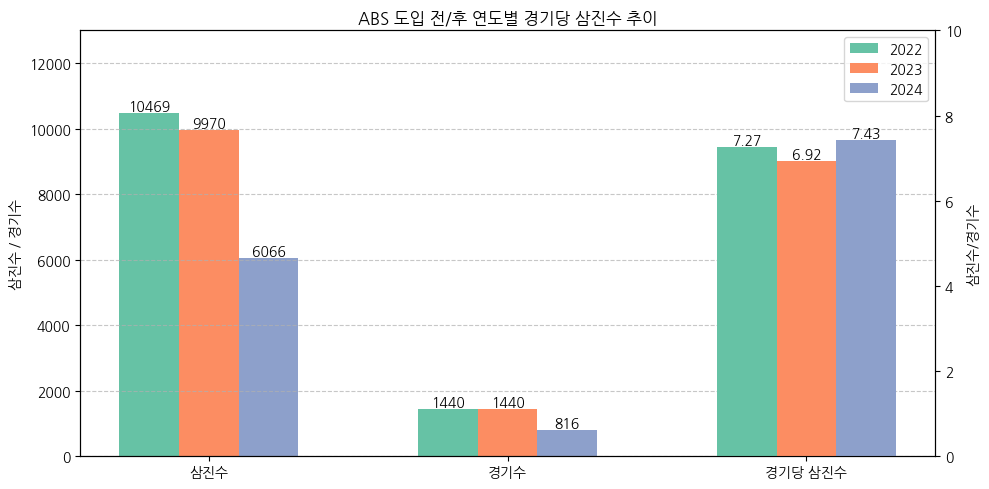

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # 두 번째 y축 생성

# x축 카테고리
categories = ['삼진수', '경기수', '경기당 삼진수']

# 막대의 위치와 너비 설정
x = np.arange(len(categories))
width = 0.2

colors = ['#66c2a5', '#fc8d62', '#8da0cb'] # 2022, 2023, 2024년 색상

# 데이터 추출 및 그래프 그리기
for i, (year, df) in enumerate(zip(['2022', '2023', '2024'], [df_team_22_2, df_team_23_2, df_team_24_2])):
    삼진수 = df['삼진수'][0]
    경기수 = df['경기수'][0]
    삼진수_경기수 = 삼진수 / 경기수
    
    # 삼진수 경기수는 ax1에 그리기
    ax1.bar(x[:2] + (i-1)*width, [삼진수, 경기수], width, label=year, color=colors[i])
    
    # 삼진수/경기수는 ax2에 그리기
    ax2.bar(x[2] + (i-1)*width, 삼진수_경기수, width, color=colors[i])

    # 각 막대 위에 값 표시
    for j, val in enumerate([삼진수, 경기수]):
        ax1.text(x[j] + (i-1)*width, val, f'{val:.0f}', ha='center', va='bottom')
    
    ax2.text(x[2] + (i-1)*width, 삼진수_경기수, f'{삼진수_경기수:.2f}', ha='center', va='bottom')

# 그래프 꾸미기
ax1.set_ylabel('삼진수 / 경기수')
ax2.set_ylabel('삼진수/경기수')
ax1.set_title('ABS 도입 전/후 연도별 경기당 삼진수 추이')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper right')

# 그리드 추가
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# y축 범위 설정
ax1.set_ylim(00, 13000)
ax2.set_ylim(0, 10.00)

plt.tight_layout()
plt.show()

- 아직 24시즌이 끝나지 않았기 때문에 경기당 수로 계산해보니, 지난 2시즌과 비교하였을 때 ABS 도입 후 삼구수가 늘었음을 알 수있다. 

팀별

In [116]:
samjin_22 =[]; samjin_23 =[]; samjin_24 =[] 

In [117]:
cursor = eda.cursor(buffered=True)
sql = (f'''select 팀명,  삼진 , 경기_수 from 팀기록_투수 where year like 22 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    samjin_22.append(i)

cursor = eda.cursor(buffered=True)
sql = (f'''select  팀명,  삼진 , 경기_수 from 팀기록_투수 where year like 23 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    samjin_23.append(i)

cursor = eda.cursor(buffered=True)
sql = (f'''select  팀명,  삼진 , 경기_수 from 팀기록_투수 where year like 24 ''')
cursor.execute(sql)
result = cursor.fetchall()

for i in result:
    samjin_24.append(i)

In [126]:
df_samjin_24 = pd.DataFrame(samjin_24, columns=('팀명','삼진수','경기수')).sort_values(by='팀명')
df_samjin_23= pd.DataFrame(samjin_23, columns=('팀명','삼진수','경기수')).sort_values(by='팀명')
df_samjin_22= pd.DataFrame(samjin_22, columns=('팀명','삼진수','경기수')).sort_values(by='팀명')

In [127]:
df_samjin_24['삼진수']= round((df_samjin_24['삼진수']/df_sagu_24['경기수']),2)
df_samjin_23['삼진수']= round((df_samjin_23['삼진수']/df_sagu_23['경기수']),2)
df_samjin_22['삼진수']= round((df_samjin_22['삼진수']/df_sagu_22['경기수']),2)

In [128]:
df_samjin_24

,팀명,삼진수,경기수
0,KIA,7.68,81
9,KT,7.67,83
2,LG,7.52,84
4,NC,7.57,81
8,SSG,8.44,82
3,두산,7.18,85
5,롯데,7.49,78
1,삼성,6.90,83
6,키움,6.30,79
7,한화,7.56,80


In [190]:
df_samjin_24

,팀명,삼진수,경기수
0,KIA,7.68,81
9,KT,7.67,83
2,LG,7.52,84
4,NC,7.57,81
8,SSG,8.44,82
3,두산,7.18,85
5,롯데,7.49,78
1,삼성,6.90,83
6,키움,6.30,79
7,한화,7.56,80


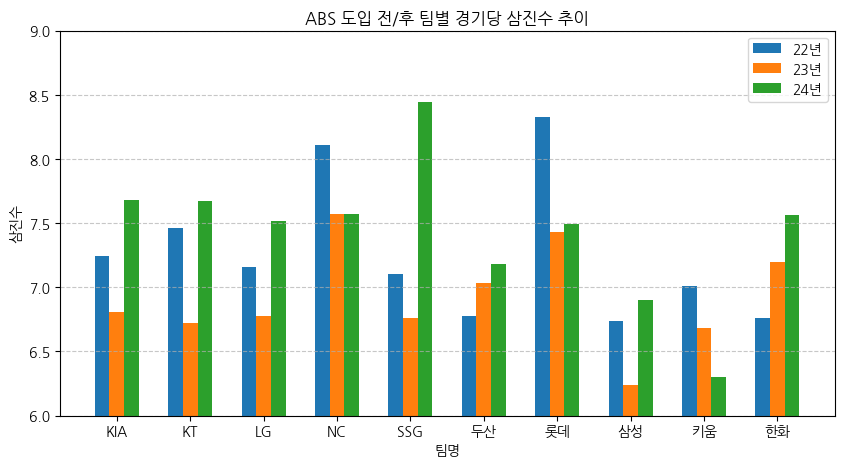

In [205]:
w = 0.2
idx = np.arange(10) #행 갯수

plt.figure(figsize=(10,5))
plt.bar(idx - w, df_samjin_22['삼진수'], width=w, label= '22년')
plt.bar(idx , df_samjin_23['삼진수'],width=w,label= '23년')
plt.bar(idx + w, df_samjin_24['삼진수'],width=w, label= '24년')
plt.xticks(idx, df_samjin_22['팀명'])
plt.legend()
plt.title('ABS 도입 전/후 팀별 경기당 삼진수 추이')
plt.xlabel('팀명')
plt.ylabel('삼진수')
plt.ylim(6,9)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()